# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  

from scipy.stats import shapiro

# split train test
from sklearn.model_selection import train_test_split

# scaler
from sklearn.preprocessing import MinMaxScaler

# encoding

from sklearn.preprocessing import LabelEncoder

# model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


# pipeline
from sklearn.pipeline import Pipeline

# model evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import  recall_score, confusion_matrix

# save & load
import pickle

Sumber dataset :
https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset/data

Penjelasan kolom :
- age  : umur 
- gender : jenis kelamin (0 untuk perempuan, 1 untuk laki-laki)
- impluse : detak jantung 
- pressurehight : sistolik (tekanan darah saat jantung berkontraksi/berdetak)
- pressurelow : diastolik (tekanan darah saat jantung beristirahat/diantara detak)
- glucose : kadar gula darah
- kcm : test CK-MB (test pendeteksi enzim kreatin kinase)
- troponin : test troponin (test kadar troponin/protein yang dilepaskan jika terjadi kerusakan jantung)
- class : prediksi positif dan negatif terhadap penyakit jantung

# Data Loading

In [2]:
# Load dataset csv

df = pd.read_csv('Heart Attack.csv')


In [3]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
# cek null value

df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [5]:
# cek shape dataframe

df.shape

(1319, 9)

In [6]:
# cek data duplikat

sum(df.duplicated())

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


# EDA

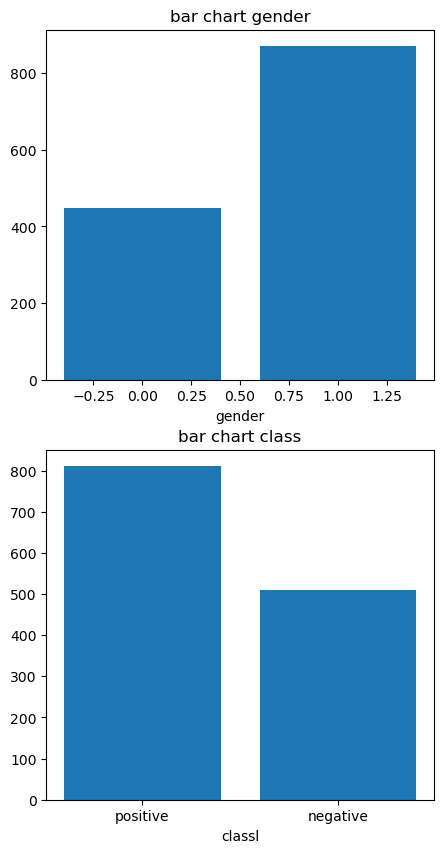

In [8]:
# bar chart kategorikal

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5, 10))

ax1.bar(df['gender'].value_counts().index, df['gender'].value_counts().values)
ax1.set_xlabel('gender')
ax1.set_title('bar chart gender')

ax2.bar(df['class'].value_counts().index, df['class'].value_counts().values)
ax2.set_xlabel('classl')
ax2.set_title('bar chart class')

plt.show()

Dari bar plot kolom kategorikal dan kolom label, data masih cukup balance

In [9]:
# drop kolom kategorikal

df_num = df.drop(['gender', 'class'], axis=1)

df_num

,age,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,66,160,83,160.0,1.80,0.012
1,21,94,98,46,296.0,6.75,1.060
2,55,64,160,77,270.0,1.99,0.003
3,64,70,120,55,270.0,13.87,0.122
4,55,64,112,65,300.0,1.08,0.003
...,...,...,...,...,...,...,...
1314,44,94,122,67,204.0,1.63,0.006
1315,66,84,125,55,149.0,1.33,0.172
1316,45,85,168,104,96.0,1.24,4.250
1317,54,58,117,68,443.0,5.80,0.359


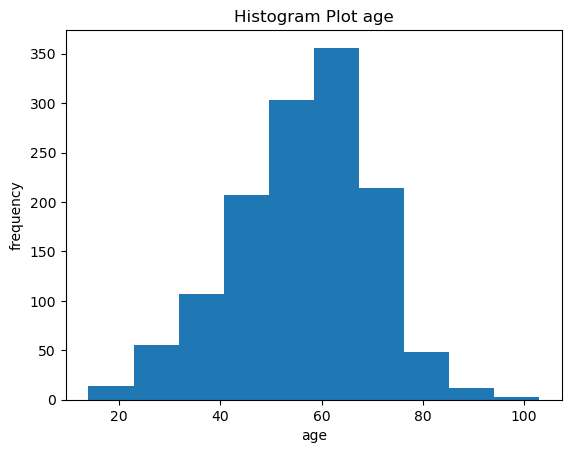

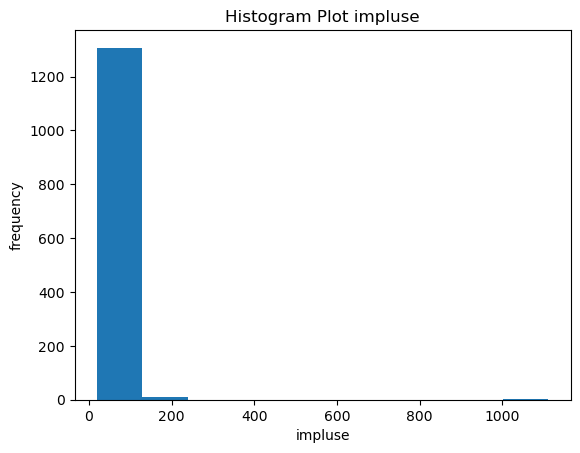

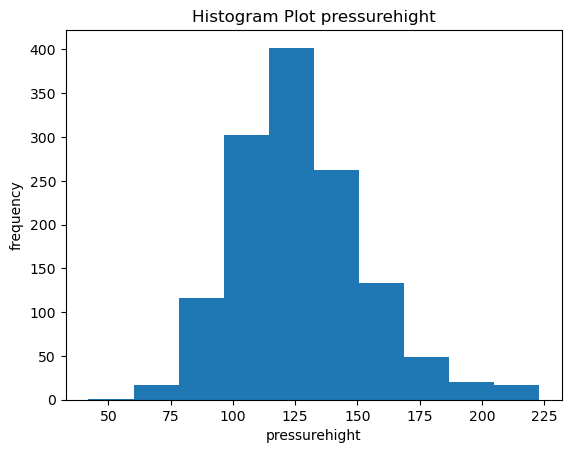

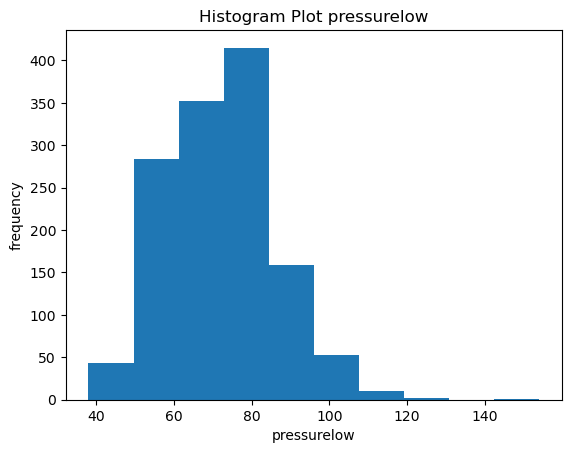

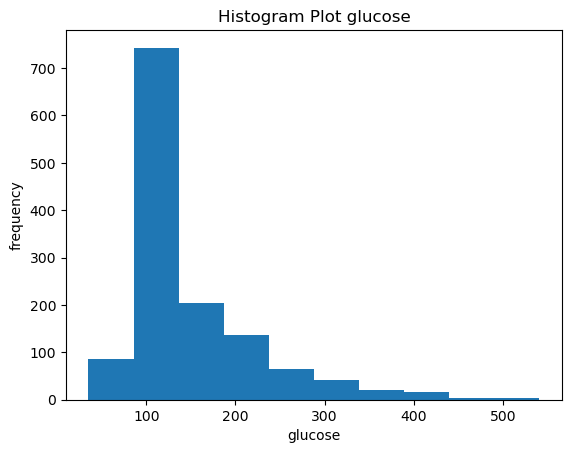

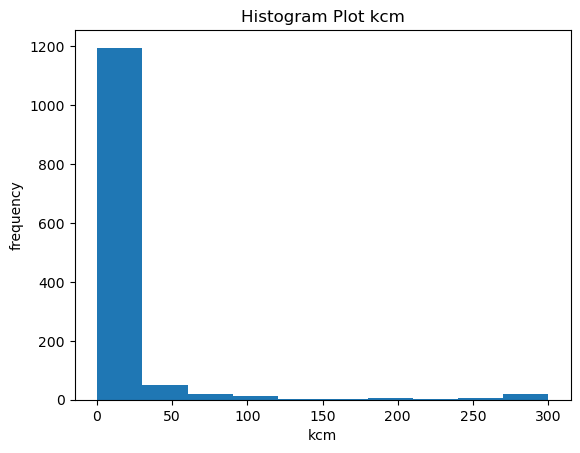

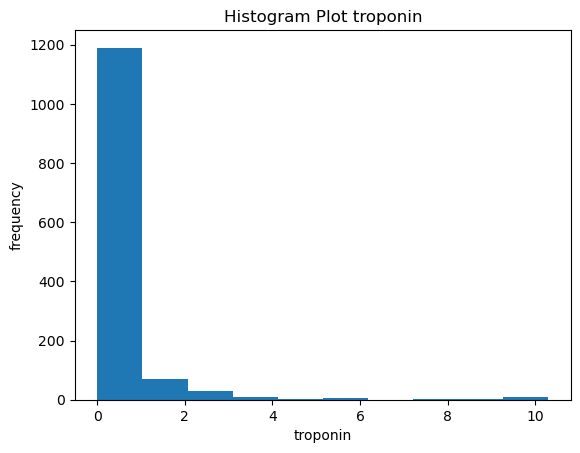

In [10]:
# fungsi plot histogram

def hist_column(df_num, column_name):
    plt.hist(df_num[column_name], bins=10)
    plt.xlabel(column_name)
    plt.ylabel('frequency')
    plt.title(f'Histogram Plot {column_name}')
    plt.show()


for column in df_num.columns:
    hist_column(df_num, column)

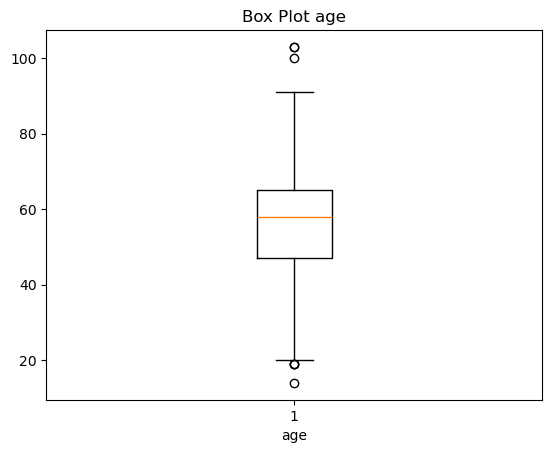

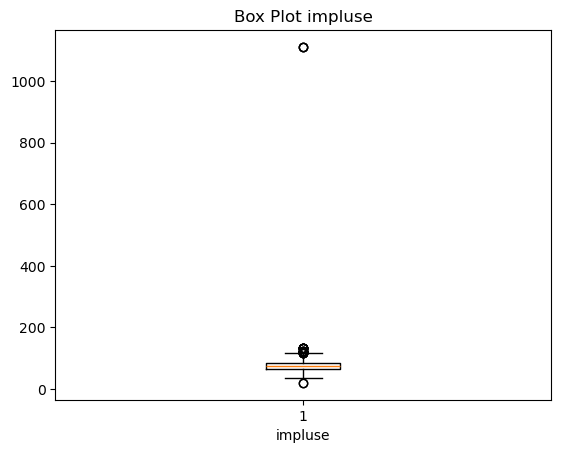

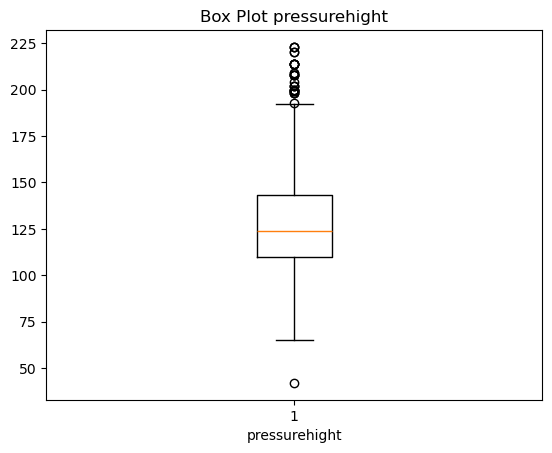

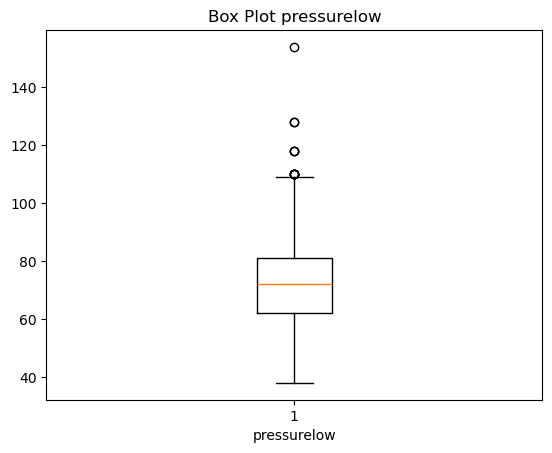

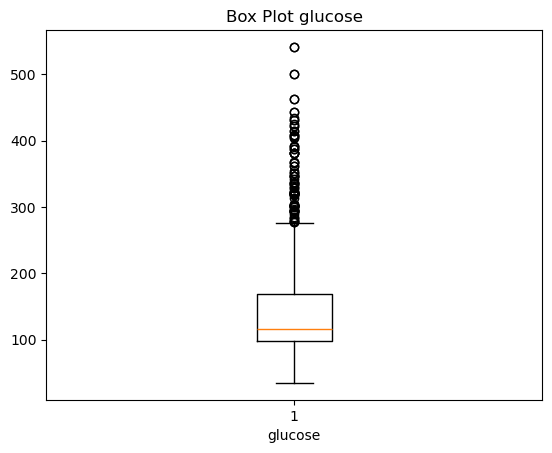

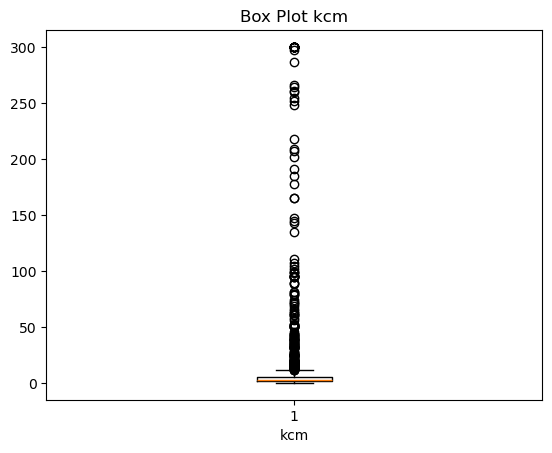

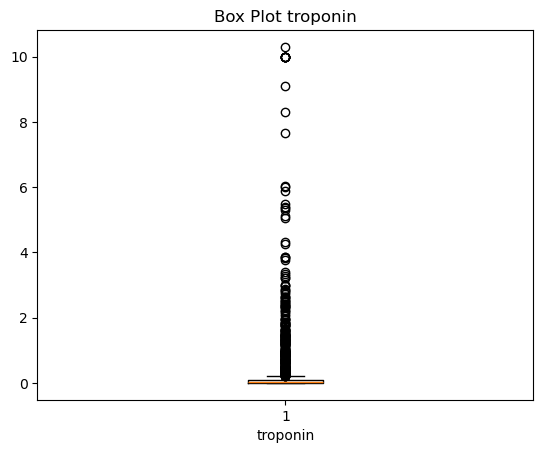

In [11]:
# fungsi plot box

def box_column(df_num, column_name):
    plt.boxplot(df_num[column_name])
    plt.xlabel(column_name)
    plt.title(f'Box Plot {column_name}')
    plt.show()


for column in df_num.columns:
    box_column(df_num, column)

Dari visualisasi plot diatas, data memiliki kecenderungan distribusi tidak normal dan masih terdapat outlier, sehingga perlu dilakukan handling outlier

In [12]:
for column in df_num.columns:
    stat, p_value = shapiro(df_num[column])
    print(f'Column: {column}, p-value: {p_value}')

Column: age, p-value: 4.902371983916964e-07
Column: impluse, p-value: 0.0
Column: pressurehight, p-value: 2.3774391591009246e-15
Column: pressurelow, p-value: 7.229008364140199e-11
Column: glucose, p-value: 1.6392947152460511e-38
Column: kcm, p-value: 0.0
Column: troponin, p-value: 0.0


In [13]:
# cek data balance target

df['class'].value_counts()

class
positive    810
negative    509
Name: count, dtype: int64

# Feature Engineering

In [14]:
# encoding kolom target

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [15]:
# cek label class yang sudah di encode 
df['class']

0       0
1       1
2       0
3       1
4       0
       ..
1314    0
1315    1
1316    1
1317    1
1318    1
Name: class, Length: 1319, dtype: int32

- Label 0 untuk negative
- Label 1 untuk positive


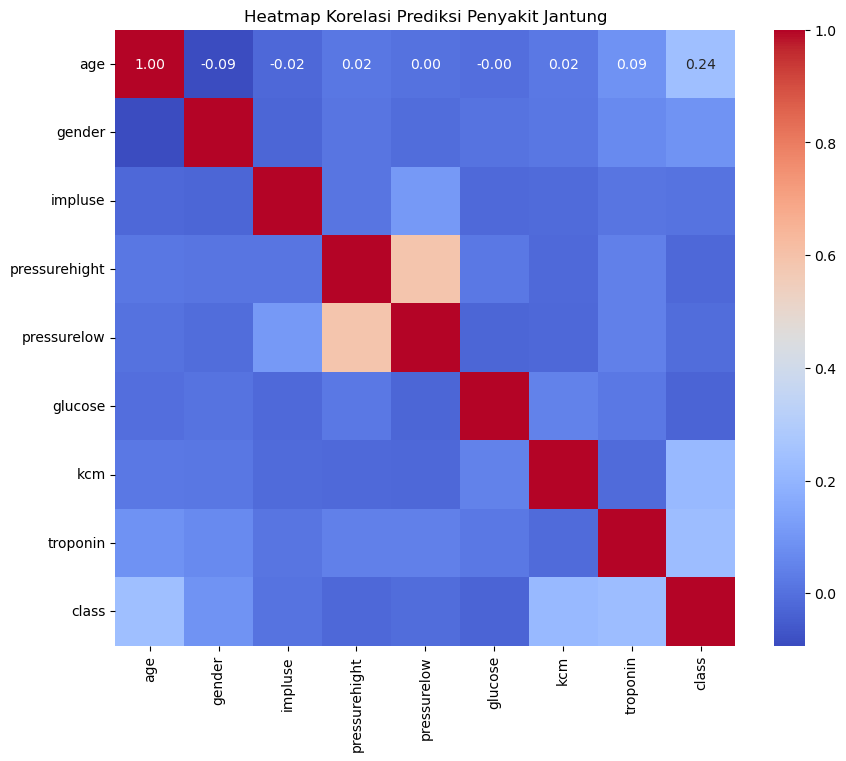

In [16]:
# Korelasi heatmap Prediksi Penyakit Jantung

corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Prediksi Penyakit Jantung')
plt.show()

Dari heatmap correlation diatas, dapat diketahui fitur yang memiliki korelasi yang lebih terhadap target yaitu fitur/kolom age,kcm, dan troponin.

In [17]:
# cek korelasi scipy terhadap target

correlation_values = df.corr()['class'].abs()


In [18]:
selected_features = correlation_values[correlation_values > 0.2].index.tolist()
selected_features

['age', 'kcm', 'troponin', 'class']

In [19]:
# split train test

X_train, X_test, y_train, y_test = train_test_split(df.drop(['class', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose'], axis=1), df['class'], test_size=0.2, random_state=50, shuffle=False)

X_train

,age,kcm,troponin
0,64,1.80,0.012
1,21,6.75,1.060
2,55,1.99,0.003
3,64,13.87,0.122
4,55,1.08,0.003
...,...,...,...
1050,79,4.41,0.553
1051,66,3.78,0.074
1052,65,4.57,0.549
1053,74,2.05,0.012


In [20]:
# handling outliers

# fungsi handling outliers

def handling_outliers(X_train, X_test, k=1.5 ):
    
    data_cleaned_train = X_train.copy()

    for column in X_train.columns:
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        data_cleaned_train[column] = data_cleaned_train[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    data_cleaned_test = X_test.copy()

    for column in X_test.columns:
        Q1 = X_test[column].quantile(0.25)
        Q3 = X_test[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        data_cleaned_test[column] = data_cleaned_test[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return data_cleaned_train, data_cleaned_test

In [21]:
# memanggil fungsi handling outliers 

handling_outliers(X_train, X_test)

(       age     kcm  troponin
 0     64.0   1.800   0.01200
 1     22.5   6.750   0.23125
 2     55.0   1.990   0.00300
 3     64.0  11.685   0.12200
 4     55.0   1.080   0.00300
 ...    ...     ...       ...
 1050  79.0   4.410   0.23125
 1051  66.0   3.780   0.07400
 1052  65.0   4.570   0.23125
 1053  74.0   2.050   0.01200
 1054  50.0   1.100   0.00400
 
 [1055 rows x 3 columns],
        age       kcm  troponin
 1055  77.0   2.14000  0.039000
 1056  74.0  11.45000  0.147875
 1057  31.0   7.30000  0.005000
 1058  37.0   4.84000  0.004000
 1059  67.0   6.57000  0.147875
 ...    ...       ...       ...
 1314  44.0   1.63000  0.006000
 1315  66.0   1.33000  0.147875
 1316  45.0   1.24000  0.147875
 1317  54.0   5.80000  0.147875
 1318  51.0  13.78125  0.147875
 
 [264 rows x 3 columns])

In [22]:
# scaling / normalisasi

scaler = MinMaxScaler()

x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.transform(X_test)


Scaler menggunakan MinMaxScaler dikarenakan distribusi data tidak normal

# Model Definition

In [23]:
# search best parameter knn

param_grid = {'n_neighbors': [3, 5, 7], 'weights' : ['uniform', 'distance'],
'algorithm' : ['ball_tree', 'auto', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)
grid_search_knn.fit(x_train_scale, y_train)
print('Best Parameter KNN :', grid_search_knn.best_params_)

Best Parameter KNN : {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


In [24]:
# search best parameter svm

param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 2.0],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree' : [3, 4, 5],
              'gamma' : ['scale', 'auto']
}

svm = SVC(random_state=50)
grid_search_svm = GridSearchCV(svm, param_grid, cv=5)
grid_search_svm.fit(x_train_scale, y_train)
print('Best Parameter SVM :', grid_search_svm.best_params_)

Best Parameter SVM : {'C': 2.0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [25]:
# search best parameter decision tree

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'max_depth': [4, 5, 6],
}

decision_tree = DecisionTreeClassifier(random_state=50)
grid_search_dt = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search_dt.fit(x_train_scale, y_train)
print('Best Parameter Decision Tree :', grid_search_dt.best_params_)

Best Parameter Decision Tree : {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


In [26]:
# search best parameter random forest

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [4, 5, 6],
}

random_forest = RandomForestClassifier(random_state=50)
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5)
grid_search_rf.fit(x_train_scale, y_train)
print('Best Parameter Random Forest :', grid_search_rf.best_params_)

Best Parameter Random Forest : {'criterion': 'gini', 'max_depth': 6}


In [27]:
# list best parameter dari semua model 

print('list best parameter dari grid search setiap model :', '\n')
print('Best Parameter KNN :', grid_search_knn.best_params_)
print('------------------------------------------------')
print('Best Parameter SVM :', grid_search_svm.best_params_)
print('------------------------------------------------')
print('Best Parameter Decision Tree :', grid_search_dt.best_params_)
print('------------------------------------------------')
print('Best Parameter Random Forest :', grid_search_rf.best_params_)


list best parameter dari grid search setiap model : 

Best Parameter KNN : {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
------------------------------------------------
Best Parameter SVM : {'C': 2.0, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
------------------------------------------------
Best Parameter Decision Tree : {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
------------------------------------------------
Best Parameter Random Forest : {'criterion': 'gini', 'max_depth': 6}


# Model Training

In [28]:
# fit best parameter untuk KNN

modelknn = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 5, weights= 'distance')

modelknn.fit(x_train_scale, y_train)


KNeighborsClassifier(algorithm='ball_tree', weights='distance')

In [29]:
# fit best parameter untuk KNN

modelsvm = SVC( C=2.0, degree=5, gamma= 'scale', kernel='poly')

modelsvm.fit(x_train_scale, y_train)

SVC(C=2.0, degree=5, kernel='poly')

In [30]:
# fit best parameter untuk decision tree

model_decision_tree = DecisionTreeClassifier( criterion= 'entropy', max_depth= 4, splitter= 'best')

model_decision_tree.fit(x_train_scale, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [31]:
# fit best parameter untuk random forest

model_random_forest = RandomForestClassifier( criterion= 'gini', max_depth= 4)

model_random_forest.fit(x_train_scale, y_train)

RandomForestClassifier(max_depth=4)

In [32]:
# model training dengan boosting AdaBoost dengan base model decison tree

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier( criterion= 'entropy', max_depth= 4, splitter= 'best'))
ada_clf.fit(x_train_scale, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=4))

In [33]:
# prediksi model knn

y_pred_knn_train = modelknn.predict(x_train_scale)
y_pred_knn = modelknn.predict(x_test_scale)


# prediksi model decision tree

y_pred_decision_tree_train = model_decision_tree.predict(x_train_scale)
y_pred_decision_tree = model_decision_tree.predict(x_test_scale)


# prediksi model svm

y_pred_svm_train = modelsvm.predict(x_train_scale)
y_pred_svm = modelsvm.predict(x_test_scale)


# prediksi model random forest

y_pred_random_forest_train = model_random_forest.predict(x_train_scale)
y_pred_random_forest = model_random_forest.predict(x_test_scale)

# Model Evaluation

classification report knn model (Train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       644

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055



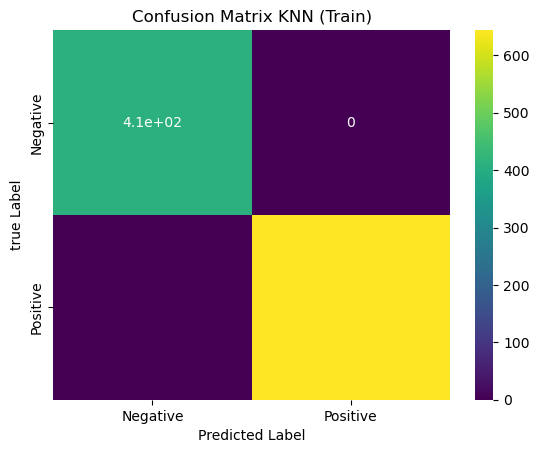

In [34]:
# classification report knn train

classification_report_knn_train = classification_report(y_train, y_pred_knn_train)

print('classification report knn model (Train)')
print('\n')
print(classification_report_knn_train)

# confusion matrix knn train

cm_knn = confusion_matrix(y_train, y_pred_knn_train)
sns.heatmap(cm_knn, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix KNN (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report knn model (Test)


              precision    recall  f1-score   support

           0       0.72      0.88      0.79        98
           1       0.92      0.80      0.86       166

    accuracy                           0.83       264
   macro avg       0.82      0.84      0.82       264
weighted avg       0.85      0.83      0.83       264



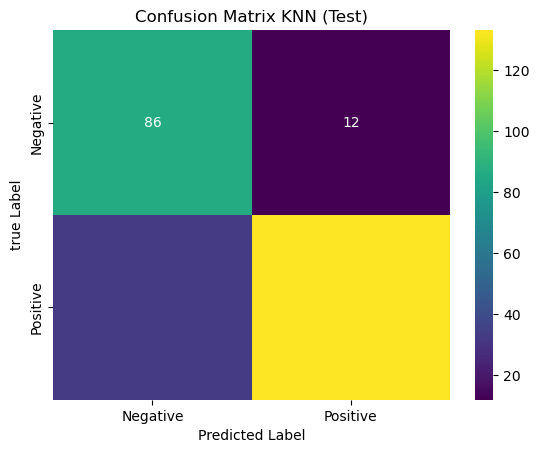

In [35]:
# classification report knn test

classification_report_knn = classification_report(y_test, y_pred_knn)

print('classification report knn model (Test)')
print('\n')
print(classification_report_knn)

# confusion matrix knn test

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix KNN (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report Decision Tree model (Train)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       411
           1       0.99      0.99      0.99       644

    accuracy                           0.99      1055
   macro avg       0.99      0.99      0.99      1055
weighted avg       0.99      0.99      0.99      1055



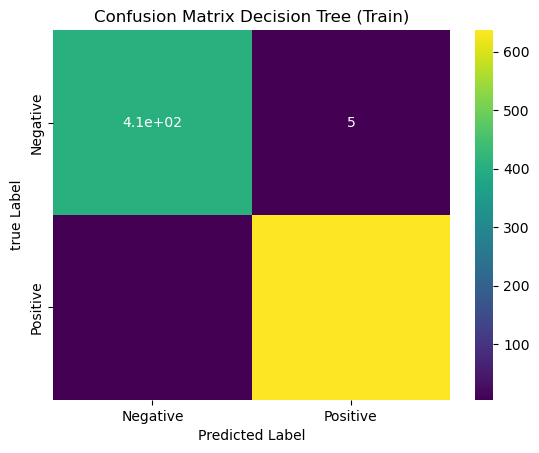

In [36]:
# classification report decision tree train

classification_report_decision_tree_train = classification_report(y_train, y_pred_decision_tree_train)

print('classification report Decision Tree model (Train)')
print('\n')
print(classification_report_decision_tree_train)

# confusion matrix decision tree train

cm_dt = confusion_matrix(y_train, y_pred_decision_tree_train)
sns.heatmap(cm_dt, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Decision Tree (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report Decision Tree model (Test)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        98
           1       0.99      0.99      0.99       166

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



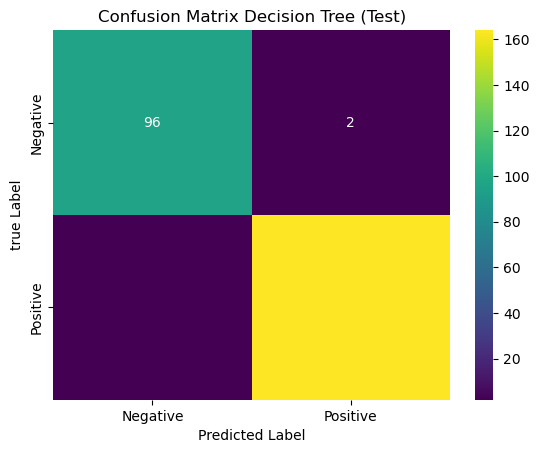

In [37]:
# classification report decision tree

classification_report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print('classification report Decision Tree model (Test)')
print('\n')
print(classification_report_decision_tree)

# confusion matrix decision tree

cm_dt = confusion_matrix(y_test, y_pred_decision_tree)
sns.heatmap(cm_dt, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Decision Tree (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report svm model (Train)


              precision    recall  f1-score   support

           0       0.65      0.96      0.77       411
           1       0.96      0.67      0.79       644

    accuracy                           0.78      1055
   macro avg       0.81      0.81      0.78      1055
weighted avg       0.84      0.78      0.78      1055



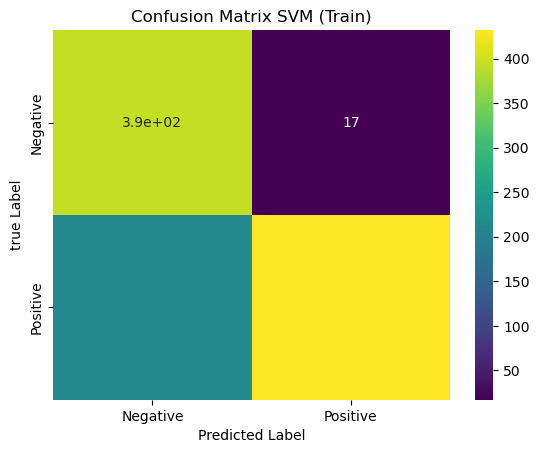

In [38]:
# classification report svm

classification_report_svm_train = classification_report(y_train, y_pred_svm_train)

print('classification report svm model (Train)')
print('\n')
print(classification_report_svm_train)

# confusion matrix svm

cm_svm = confusion_matrix(y_train, y_pred_svm_train)
sns.heatmap(cm_svm, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix SVM (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report svm model (Test)


              precision    recall  f1-score   support

           0       0.63      0.98      0.77        98
           1       0.98      0.66      0.79       166

    accuracy                           0.78       264
   macro avg       0.81      0.82      0.78       264
weighted avg       0.85      0.78      0.78       264



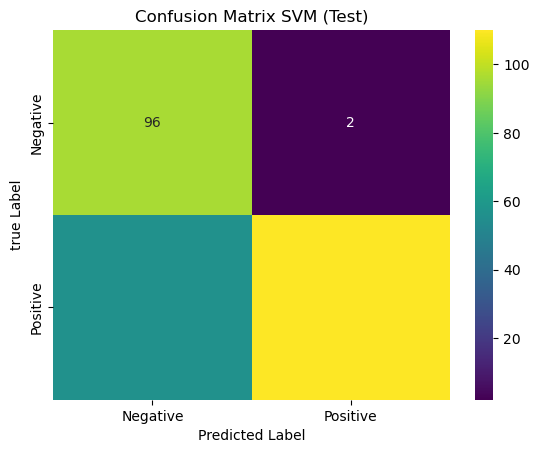

In [39]:
# classification report svm

classification_report_svm = classification_report(y_test, y_pred_svm)

print('classification report svm model (Test)')
print('\n')
print(classification_report_svm)

# confusion matrix svm

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix SVM (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report Random Forest model (Train)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       411
           1       1.00      0.98      0.99       644

    accuracy                           0.99      1055
   macro avg       0.98      0.99      0.99      1055
weighted avg       0.99      0.99      0.99      1055



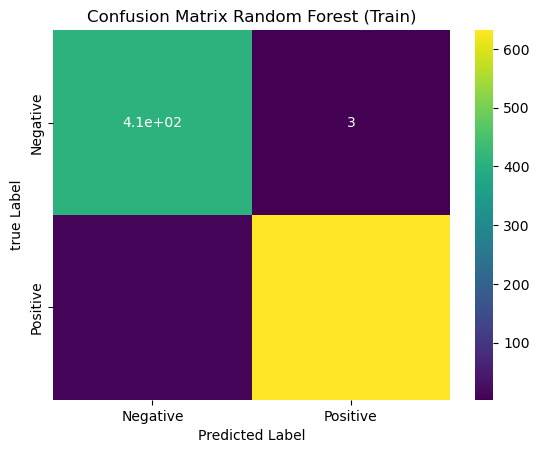

In [40]:
# classification report random forest train

classification_report_random_forest_train = classification_report(y_train, y_pred_random_forest_train)

print('classification report Random Forest model (Train)')
print('\n')
print(classification_report_random_forest_train)

# confusion matrix random forest train

cm_rf = confusion_matrix(y_train, y_pred_random_forest_train)
sns.heatmap(cm_rf, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Random Forest (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

classification report Random Forest model (Test)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.99      1.00       166

    accuracy                           1.00       264
   macro avg       0.99      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264



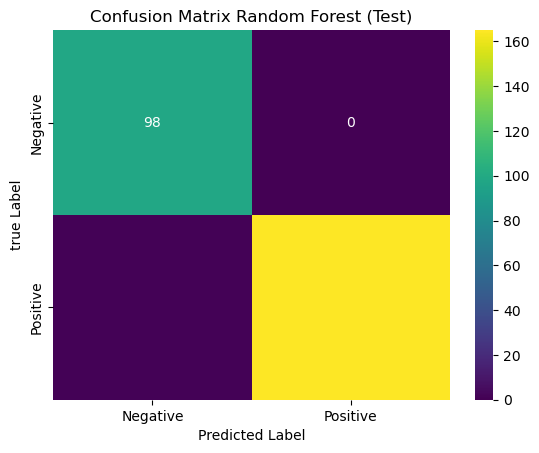

In [41]:
# classification report random forest test

classification_report_random_forest = classification_report(y_test, y_pred_random_forest)

print('classification report Random Forest model (Test)')
print('\n')
print(classification_report_random_forest)

# confusion matrix random forest test

cm_rf = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(cm_rf, annot=True, cmap='viridis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix Random Forest (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('true Label')
plt.show()

## Kesimpulan Model Evaluation

- Berdasarkan hasil evaluasi dari beberapa model, terdapat penurunan performa dari evaluasi train ke test recall terhadap kelas 1(positif) pada dua model, yaitu model SVM sebesar 0.01 dan model KNN sebesar 0.2.

- SVM merupakan model dengan performa paling buruk dengan rata-rata sekitar 60% baik pada train recall maupun test recall, berbeda dengan model-model lainnya yang memiliki performa sekitar 80-90% an persen. Sehingga dapat disimpulkan model/algoritma SVM tidak cocok diimplementasikan terhadap dataset ini.



In [42]:
# boosting
# adaboost report 

y_train_pred = ada_clf.predict(x_train_scale)
y_test_pred = ada_clf.predict(x_test_scale)

print('Recall Score - Train - AdaBoost : ', recall_score(y_train, y_train_pred, average='weighted'))
print('Recall Score - Test - AdaBoost  : ', recall_score(y_test, y_test_pred, average='weighted'))

Recall Score - Train - AdaBoost :  1.0
Recall Score - Test - AdaBoost  :  0.9848484848484849


In [43]:
# membuat fungsi untuk mengecek performa pipeline

def performance_check(clf, X, y):
  y_pred = clf.predict(X)

  return recall_score(y, y_pred, pos_label=1)

In [44]:

# membuat pipeline

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestClassifier( criterion= 'gini', max_depth= 4, random_state=50))])
pipe.fit(x_train_scale, y_train)

# cek performa pipeline

print('Recall Train :', performance_check(pipe, x_train_scale, y_train))
print('Recall Test :', performance_check(pipe, x_test_scale, y_test))

Recall Train : 0.9813664596273292
Recall Test : 0.9939759036144579


# Model Saving

In [45]:
# save model

with open("model.pkl", "wb") as f:
    pickle.dump(model_random_forest, f)

# save scaler

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Model Inference

In [46]:
# load model pkl
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# load scaler pkl
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

# tes data pengguna
data_inf = {
    'age': 67,
    'gender': 0,
    'impluse': 74,
    'pressurehight': 116,
    'pressurelow': 64,
    'glucose': 121,
    'kcm': 157,
    'troponin': 58,
}

data_inf = pd.DataFrame([data_inf])
data_inf

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,67,0,74,116,64,121,157,58


In [47]:
# drop yang bukan feature

data_inf_feature = data_inf.drop(['gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose'], axis=1)

In [48]:
# scaling data inference

data_inf_scaled = scaler.transform(data_inf_feature)

In [49]:
# prediksi data inference

data_inf_scaled_pred = model.predict(data_inf_scaled)
data_inf_scaled_pred

array([1])

hasil prediksi menunjukkan label = 1, artinya, data inference terprediksi positif penyakit jantung

In [50]:
# memasukkan hasil prediksi ke dataframe inference

data_inf['class'] = data_inf_scaled_pred
data_inf

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,67,0,74,116,64,121,157,58,1


# Pengambilan Kesimpulan

1. Berdasarkan hasil permodelan diatas, model yang memiliki performa yang paling baik terhadap prediksi penyakit jantung adalah model algoritma random forest, dengan hyperparameter menggunakan best parameter yang didapat dari gridsearch. Dimana pada model random forest ini memiliki performa recall atas kelas positif sebesar 0.99. artinya model berhasil memprediksi dengan persentase 99% terhadap orang yang positif penyakit jantung (kemungkinan kesalahan prediksi orang yang seharusnya positif terdeteksi sebagai negatif hanya 1%). Pemilihan metriks recall dikarenakan dalam kasus medis perlu fokus terhadap salah satu kelas, dimana kelas disini adalah kelas positif(orang yang terdeteksi positif penyakit jantung)

2.  Performa prediksi test algoritma random forest dan decision tree memiliki hasil yang sama yaitu recall test kelas positif yang bernilai 0.99. Namun pemilihan random forest sebagai yang terbaik karena pada random forest terjadi kenaikan dari recall train 0.98 ke recall test 0.99. artinya pada random forest mampu memprediksi lebih baik setelah dilakukan train, sedangkan pada decision tree tidak ada kenaikan maupun penurunan pada recall train dan test dimana skor yang didapatkan statis di 0.99

3. Dalam kasus medis, khususnya case ini yaitu prediksi penyakit jantung, dengan model yang mampu memprediksi kelas positif dengan persentase 99% tentunya sangat membantu dunia medis sehingga dapat memprediksi seseorang positif mengidap penyakit jantung dengan kemungkinan kesalahan hanya 1% saja. Dengan model ini, tenaga kesehatan dapat memprediksi dengan baik dan dapat memanfaatkan data-data terkait penyakit jantung sebagai model prediksi.

3. Untuk evaluasi model, tidak terdapat evaluasi karena performa model sudah baik untuk dapat memprediksi kelas positif. 


# Conceptual Problems

Jawab pertanyaan berikut:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- bagging merupakan teknik dalam ensemble learning dimana memiliki tujuan untuk dapat menggabungkan beberapa prediksi dari model yang sample datanya diambil secara acak. bagging dilakukan bertujuan untuk meningkatkan stabilitas model dan mengurangi overfitting serta ketidakpastian data. 

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- random forest merupakan bagian dari decision tree, dimana pada random forest membentuk banyak cabang pohon yang didalamnya menggunakan subset acak dan model di train secara independen atau individual secara pararel 

- adaboost/adaptive boosting merupakan bagian dari ensemble learning yang digunakan untuk meningkatkan performa dengan menggabungkan beberapa model sebelumnya yang lemah menjadi model ayng kuat

3. Jelaskan apa yang dimaksud dengan Cross Validation !

- cross validation adalah evaluasi model dengan cara memecah dataset menjadi beberapa bagian yang disebut fold/lipatan(k). Nantinya pelatihan akan dijalankan dengan jumlah iterasi atau pengulangan sebanyak jumlah fold

# Deploy
https://huggingface.co/spaces/hammammahdy/heart_disease_prediction